<figure>
   <IMG SRC="https://mamba-python.nl/images/logo_basis.png" WIDTH=125 ALIGN="right">
   
</figure>

# Voorbeeld Python toepassing

<br>




Dit notebook is gemaakt als voorbeeld van een Python toepassing voor de MAMBA Python cursus.

<br>
<br>

<div style="text-align: right"> developed by MAMBA </div>

## Eigen toepassing 

Doel: Bepalen van de capaciteit van verschillende fietspaden in Montreal aan de hand van het gemiddelde en het maximaal aantal fietser op die fietspaden.  

input: .csv - bestand met aantal fietsers per fietspad per dag.

gewenste output: .png - Grafieken en getallen waaruit de gemiddelde en maximaal benodigde capaciteit blijkt.


## Stappenplan<a class="anchor" id="0"></a>
1. [import packages](#1)
2. [lees data in](#2)
3. [bewerk data](#3)
4. [plot resultaten](#4)
5. [Analyse](#5)
6. [Bronnen](#6)

## 1. import packages<a class="anchor" id="1"></a>

In [26]:
import pandas as pd
import os
import datetime as dt

In [7]:
#settings
%matplotlib inline
plt.style.use('seaborn')

[terug naar inhoudsopgave](#0)

## 2. lees data in <a class="anchor" id="2"></a>
In dit geval een dataset met het aantal fietsers op 9 verschillende plekken in Montreal

In [8]:
path= r'data'
fname = r'comptagevelo2012.csv'

In [14]:
df = pd.read_csv(path+'\\'+fname)

In [16]:
df.index = pd.to_datetime(df.Date)

In [17]:
%matplotlib inline

In [18]:
# bekijk eerste 3 regels
df[:3]

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,,
2012-01-01,01/01/2012,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-02-01,02/01/2012,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-03-01,03/01/2012,00:00,58,135,248,104,2.0,89,3,2,15.0


[terug naar inhoudsopgave](#0)

## 3. bewerk data<a class="anchor" id="3"></a>

In [19]:
# pas kolomnaam aan
df.rename(columns={'Unnamed: 1': 'Hour'}, inplace=True)
df[:3]

,Date,Hour,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,,
2012-01-01,01/01/2012,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-02-01,02/01/2012,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-03-01,03/01/2012,00:00,58,135,248,104,2.0,89,3,2,15.0


In [20]:
# lees de datum in als datetime object en gebruik dit als index
df.index = pd.to_datetime(df['Date'] + ' ' + df['Hour'], dayfirst=True)
df[:3]

,Date,Hour,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
2012-01-01,01/01/2012,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,02/01/2012,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,03/01/2012,00:00,58,135,248,104,2.0,89,3,2,15.0


[terug naar inhoudsopgave](#0)

## 4. Plot resultaten <a class="anchor" id="4"></a>

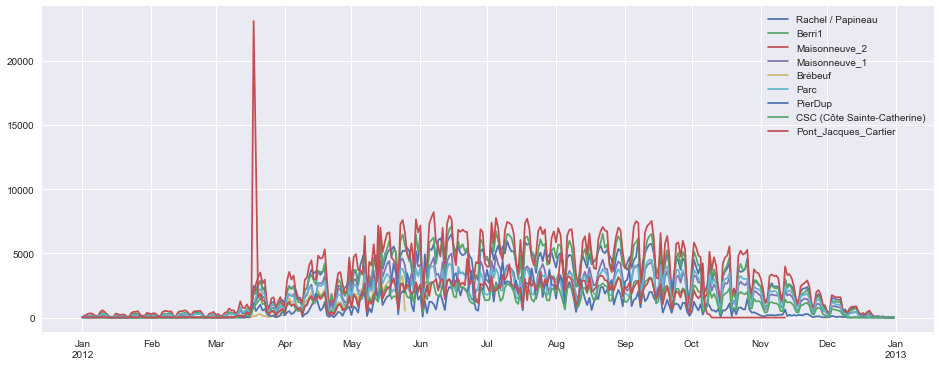

In [21]:
df.plot(figsize=(16,6))

[terug naar inhoudsopgave](#0)

## 5. Analyse <a class="anchor" id="5"></a>

In [22]:
# kijk naar het maximum aantal fietsers per pad per dag
print(df.max())

Date                           31/12/2012
Hour                                00:00
Rachel / Papineau                    6595
Berri1                               7104
Maisonneuve_2                        8220
Maisonneuve_1                        4999
Brébeuf                              3278
Parc                                 4510
PierDup                              4386
CSC (Côte Sainte-Catherine)          3124
Pont_Jacques_Cartier                23092
dtype: object


In [23]:
# kijk naar het gemiddelde aantal fietsers per pad per dag
print(df.mean())

Rachel / Papineau              2605.653005
Berri1                         2678.234973
Maisonneuve_2                  3172.120219
Maisonneuve_1                  1783.762295
Brébeuf                         630.691781
Parc                           1698.114754
PierDup                         907.019126
CSC (Côte Sainte-Catherine)    1109.306011
Pont_Jacques_Cartier           1435.914826
dtype: float64


#### Piek bij Pont Jacques Cartier

Meetpunt Pont_Jacques_Cartier laat een vreemde piek zien. Deze waarde wordt nader onderzocht door deze apart te plotten, in te zoomen en een beschrijving te maken.

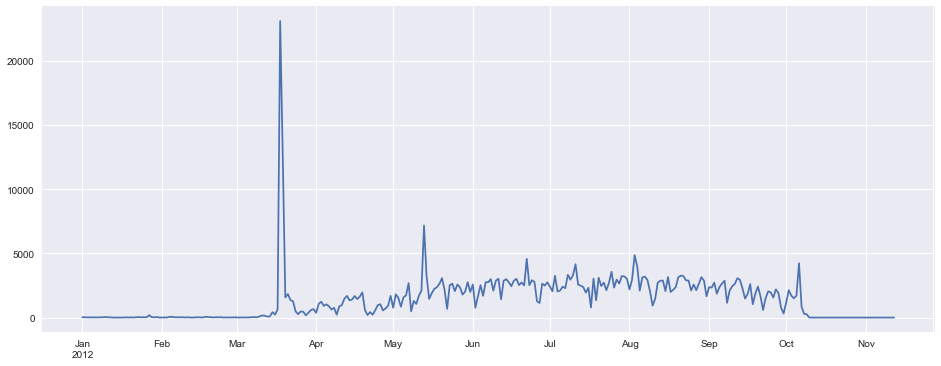

In [24]:
df['Pont_Jacques_Cartier'].plot(figsize=(16,6))

In [25]:
# zoom in op de piek
df[dt.datetime(2012,3,1):dt.datetime(2012,4,1)].plot(figsize=(16,6))

NameError: name 'dt' is not defined

In [12]:
#bekijk Pont Jacques Cartier
df['Pont_Jacques_Cartier'].describe()

count      317.000000
mean      1435.914826
std       1861.063051
min          0.000000
25%         22.000000
50%       1259.000000
75%       2440.000000
max      23092.000000
Name: Pont_Jacques_Cartier, dtype: float64

In [13]:
# Conclusie, de extreme waarde moet een fout zijn.
# verwijder piek uit de data
df.loc[dt.datetime(2012,3,18):dt.datetime(2012,3,19),'Pont_Jacques_Cartier'] = np.nan
df['Pont_Jacques_Cartier'].describe()

count     315.000000
mean     1331.746032
std      1258.852616
min         0.000000
25%        22.000000
50%      1235.000000
75%      2420.000000
max      7175.000000
Name: Pont_Jacques_Cartier, dtype: float64

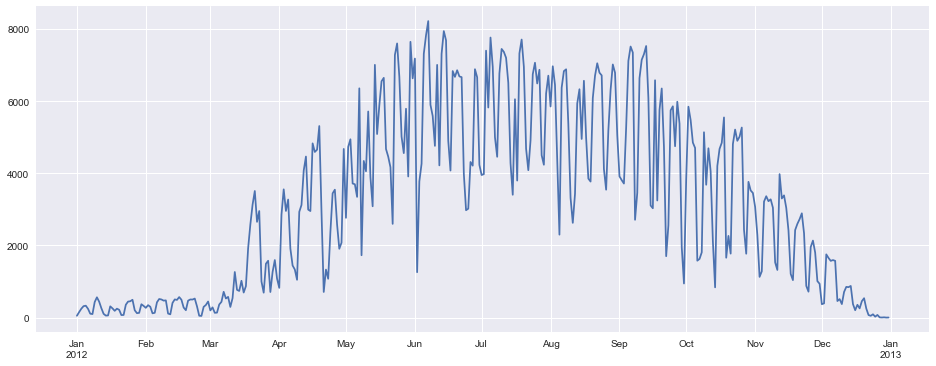

In [14]:
# probeer de variatie in het aantal fietsers te verklaren. Er zijn duidelijk meer fietsers in de zomer. 
# Maar hoe zit het met de grote schommelingen per week?
df['Maisonneuve_2'].plot(figsize=(16,6))

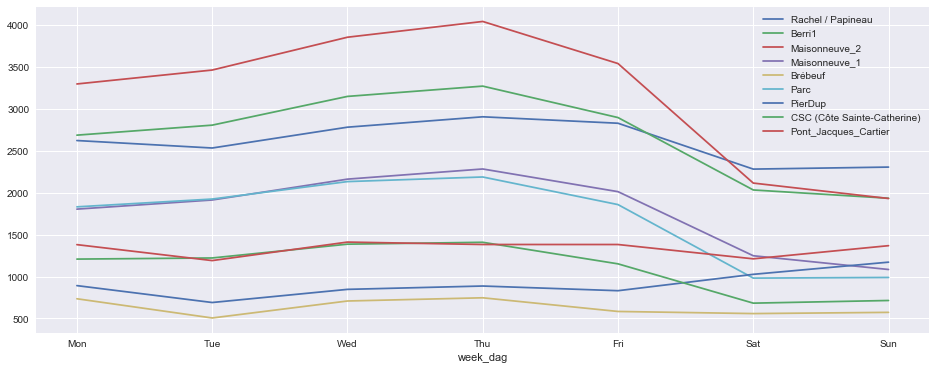

In [15]:
# plot het gemiddelde aantal fietsers per weekdag
df['week_dag'] = df.index.dayofweek
df['dag_naam'] = df.index.day_name()
gb = df.groupby('week_dag').mean()
ax = gb.plot(figsize=(16,6))
tick_labels = ax.set_xticklabels(['' , 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', ''])

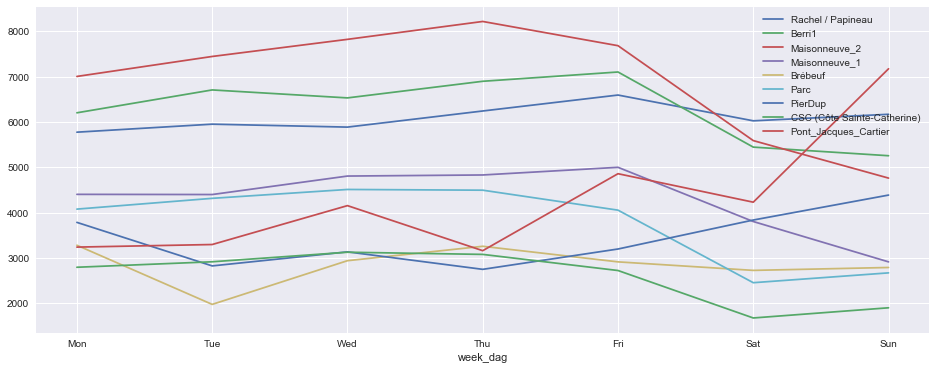

In [16]:
# plot het maximaal aantal fietsers per werkdag
df['week_dag'] = df.index.dayofweek
df['dag_naam'] = df.index.day_name()
gb = df.groupby('week_dag').max()
ax = gb.plot(figsize=(16,6))
tick_labels = ax.set_xticklabels(['' , 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', ''])

[terug naar inhoudsopgave](#0)

## 6. bronnen <a class="anchor" id="6"></a>

This notebook was created using the following sources:
- http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/v0.2/cookbook/Chapter%201%20-%20Reading%20from%20a%20CSV.ipynb